In [22]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [23]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.

application_df.drop(['EIN'], axis = 1, inplace=True)
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [24]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [25]:
# NAME value counts for binning
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                     1260
TOPS CLUB INC                                               765
UNITED STATES BOWLING CONGRESS INC                          700
WASHINGTON STATE UNIVERSITY                                 492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC             408
                                                           ... 
CROSS IT UP INC                                               1
JACKSON ALBERT DUDLEY SCHOLARSHIP FUND INC                    1
INTERNATIONAL ASSOCIATION OF LIONSC CLUBS                     1
PARENTS AND FRIENDS OF HANCOCK INC                            1
SEED HISPANIC LATINO CENTER FOR EDUCATIONAL DEVELOPMENT       1
Name: NAME, Length: 19568, dtype: int64

In [26]:
# Counts less than or equal to 5?
name_counts[name_counts <= 5]

SOCIETY OF PLASTICS ENGINEERS                              5
ACTS MISSIONS                                              5
FEDERATED GARDEN CLUBS OF MISSOURI INC                     5
HIGH TWELVE INTERNATIONAL                                  5
LEAGUE OF UNITED LATIN AMERICAN CITIZENS                   5
                                                          ..
CROSS IT UP INC                                            1
JACKSON ALBERT DUDLEY SCHOLARSHIP FUND INC                 1
INTERNATIONAL ASSOCIATION OF LIONSC CLUBS                  1
PARENTS AND FRIENDS OF HANCOCK INC                         1
SEED HISPANIC LATINO CENTER FOR EDUCATIONAL DEVELOPMENT    1
Name: NAME, Length: 19214, dtype: int64

<AxesSubplot:ylabel='Density'>

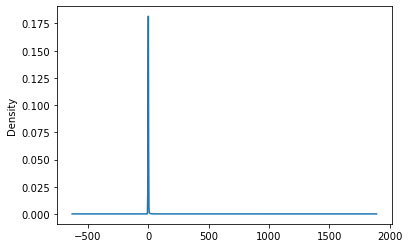

In [27]:
name_counts.plot.density()

In [28]:
# Determine which values to replace if counts are less than or equal to 5
replace_name = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for name_variable in replace_name:
    application_df.NAME = application_df.NAME.replace(name_variable,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                 20043
PARENT BOOSTER USA INC                 1260
TOPS CLUB INC                           765
UNITED STATES BOWLING CONGRESS INC      700
WASHINGTON STATE UNIVERSITY             492
                                      ...  
FLEET RESERVE ASSOCIATION                 6
THE READING FOUNDATION                    6
FREE & ACCEPTED MASONS OF GEORGIA         6
SOCIETY FOR CREATIVE ANACHRONISM          6
NATIONAL CHARITY LEAGUE INC               6
Name: NAME, Length: 355, dtype: int64

In [29]:
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [30]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [31]:
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2380        1
C1236        1
C4200        1
C6100        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [32]:
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [33]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [34]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)


# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE

encode1 = enc.fit_transform(application_df[application_cat])

encode_df = pd.DataFrame(encode1)

              

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

# Remove loan status target from features data
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"], axis=1).values


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #stratify=y

In [37]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
X_train.shape

(25724, 398)

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 75
hidden_nodes_layer3 = 10


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               39900     
_________________________________________________________________
dense_5 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                760       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 48,246
Trainable params: 48,246
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"


# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 867us/step - loss: 0.5145 - accuracy: 0.7518
Epoch 2/100
166/804 [=====>........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.7980
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4295 - accuracy: 0.7957
Epoch 3/100
377/804 [=============>................] - ETA: 0s - loss: 0.4208 - accuracy: 0.8023
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4223 - accuracy: 0.8006
Epoch 4/100
574/804 [====================>.........] - ETA: 0s - loss: 0.4210 - accuracy: 0.7995
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4215 - accuracy: 0.7989
Epoch 5/100
754/804 [===========================>..] - ETA: 0s - loss: 0.4229 - accuracy: 0.8023
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
804/804 [=

804/804 [==============================] - 2s 2ms/step - loss: 0.4123 - accuracy: 0.8015
Epoch 39/100
436/804 [===============>..............] - ETA: 0s - loss: 0.4054 - accuracy: 0.8098
Epoch 00039: saving model to checkpoints2\weights.39.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4052 - accuracy: 0.8083: 0s - los
Epoch 40/100
624/804 [======================>.......] - ETA: 0s - loss: 0.4063 - accuracy: 0.8046
Epoch 00040: saving model to checkpoints2\weights.40.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4057 - accuracy: 0.8055
Epoch 41/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4031 - accuracy: 0.8067
Epoch 42/100
 21/804 [..............................] - ETA: 2s - loss: 0.4798 - accuracy: 0.7494
Epoch 00042: saving model to checkpoints2\weights.42.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4072 - accuracy: 0.8076
Epoch 43/100
232/804 [=======>......................] - ETA: 1s 

672/804 [========================>.....] - ETA: 0s - loss: 0.3943 - accuracy: 0.8124
Epoch 00076: saving model to checkpoints2\weights.76.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.3950 - accuracy: 0.8119
Epoch 77/100
804/804 [==============================] - 1s 2ms/step - loss: 0.3942 - accuracy: 0.8109
Epoch 78/100
 75/804 [=>............................] - ETA: 1s - loss: 0.3946 - accuracy: 0.8115
Epoch 00078: saving model to checkpoints2\weights.78.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.3983 - accuracy: 0.8072
Epoch 79/100
287/804 [=========>....................] - ETA: 0s - loss: 0.3973 - accuracy: 0.8131
Epoch 00079: saving model to checkpoints2\weights.79.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.8100
Epoch 80/100
465/804 [================>.............] - ETA: 0s - loss: 0.3970 - accuracy: 0.8033
Epoch 00080: saving model to checkpoints2\weights.80.hdf5
804/804 [===========

In [42]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")